# **Housing Sales Analysis Final Project**
Team Members:
Jameel Saccoh
James Shoenhair
Bereket Tarekegn

In [41]:
#install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [15]:
# Load and preview housing dataset
housing = pd.read_csv('house_sales.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
#Find the number of records within the dataset
print("Number of records:", housing.shape[0],"\n")

#Find all the null values within the dataset
print(housing.isna().sum())

Number of records: 21613 

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [17]:
#Handle missing values for bedroom and bathroom columns with median imputation
housing['bedrooms'].fillna(housing['bedrooms'].median(), inplace=True)
housing['bathrooms'].fillna(housing['bathrooms'].median(), inplace=True)

#Handle missing values for sqft_living and sqft_lot columns with mean imputation rounded to the nearest integer
housing['sqft_living'].fillna(round(housing['sqft_living'].mean(),0), inplace=True)
housing['sqft_lot'].fillna(round(housing['sqft_lot'].mean(),0), inplace=True)

#Check for any remaining null values
print(housing.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


C:\Users\jamee\AppData\Local\Temp\ipykernel_8164\3364273193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['bedrooms'].fillna(housing['bedrooms'].median(), inplace=True)
C:\Users\jamee\AppData\Local\Temp\ipykernel_8164\3364273193.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

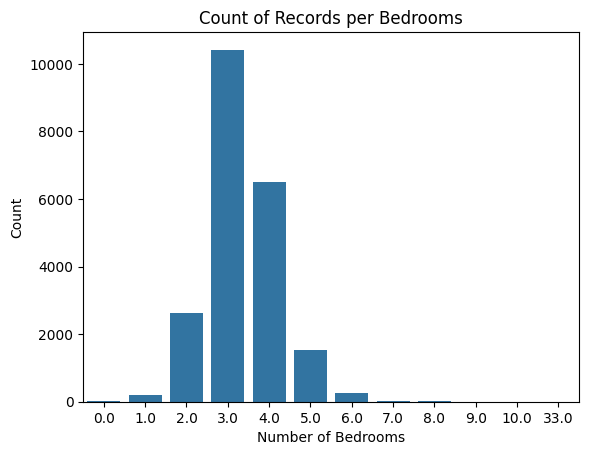

In [ ]:
#Plot count of records per number of bedrooms
sns.countplot(x='bedrooms', data=housing)
plt.title('Count of Records per Bedrooms number')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

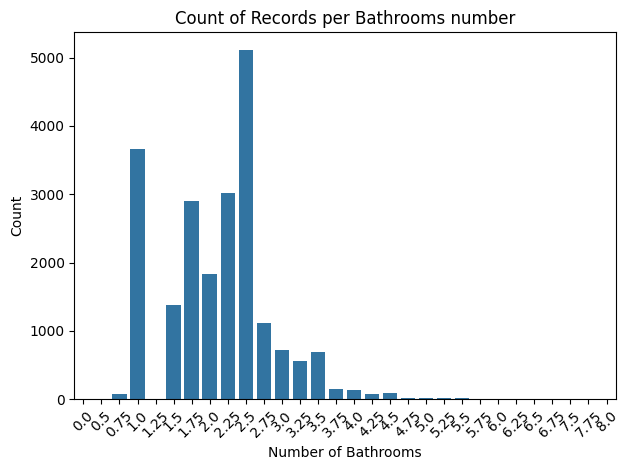

In [24]:
#Plot count of records per number of bathrooms
sns.countplot(x='bathrooms', data=housing)
plt.title('Count of Records per Bathrooms number')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

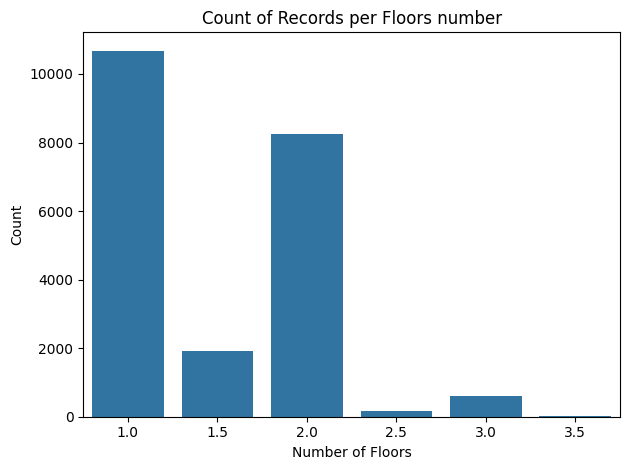

In [28]:
#Plot count of records per number of floors
sns.countplot(x='floors', data=housing)
plt.title('Count of Records per Floors number')
plt.xlabel('Number of Floors')
plt.ylabel('Count')
plt.tight_layout()

Insights: As we can see from our plots, the majority of the houses within this dataset are based off 3-4 bedroom houses, 1-2.5 bathroom houses, and 1-2 floors. These visualizations can paint an image of the house structure this dataset will focus on. 

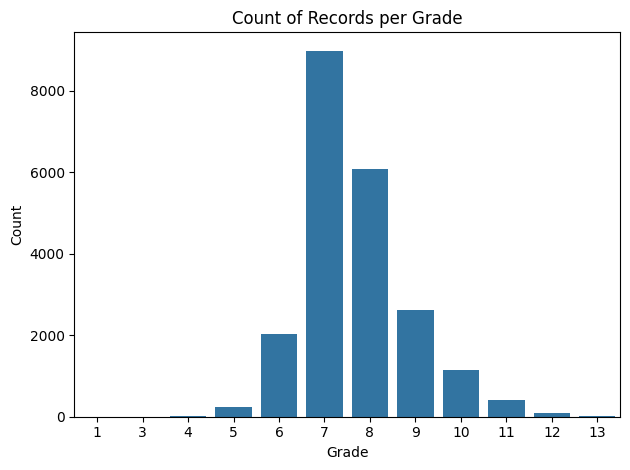

In [ ]:
#Plot count of records per grade
sns.countplot(x='grade', data=housing)
plt.title('Count of Records per Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.tight_layout()

Insights: Based off the plot, we can see that the majority of our records have a grade of 7 and 8. This indicates that most of our data is in the middle of the grade scale. Houses dont seem to have very negative grades, but also do not have very positive grades and seem to fall around the middle and above average grades.

In [33]:
#Create subset of data with price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, and grade
struct_df = housing[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade']]

#Calculate correlation matrix
correlation_matrix = struct_df.corr()

#print correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                 price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price        1.000000  0.302493   0.515365     0.681806  0.086295  0.256794   
bedrooms     0.302493  1.000000   0.487280     0.549012  0.027169  0.172168   
bathrooms    0.515365  0.487280   1.000000     0.714817  0.083221  0.487859   
sqft_living  0.681806  0.549012   0.714817     1.000000  0.160199  0.345740   
sqft_lot     0.086295  0.027169   0.083221     0.160199  1.000000 -0.005540   
floors       0.256794  0.172168   0.487859     0.345740 -0.005540  1.000000   
grade        0.667434  0.348556   0.648745     0.744523  0.109002  0.458183   

                grade  
price        0.667434  
bedrooms     0.348556  
bathrooms    0.648745  
sqft_living  0.744523  
sqft_lot     0.109002  
floors       0.458183  
grade        1.000000  


Insights: Based off the correlation index, We see that grade, bathrooms, and squ_living have the highest correlation with price out of the features listed. grade has a correlation of 0.667434, squ_living has a correlation of 0.681806, and bathrooms has a correlation of 0.515365. These are all considered moderate or high correlation which means when these features increase, price seems to increase.

In [39]:
#Split the data between training and testing sets
X = struct_df.drop('price', axis=1)
y = struct_df['price']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a linear regression model
model = LinearRegression()

#Fit the model to the training data
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Check the R-squared value of the model
r2 = model.score(X_test, y_test)
print(f"R-squared value: {r2:.2f}")

R-squared value: 0.54


Insights: Based off of the accuracy of our score, it doesnt seem like the features can accurately predict the price. We may need to use different features.